In [2]:
import cv2
import gluoncv
import gym
import numpy as np
from gym import spaces
import copy
from matplotlib import pyplot as plt

import torch.nn as nn
import torchvision.models as models

import utils

In [4]:
## FROM GYM-PROJECT    
def get_patches(voc_dataset, img_index):
    image, label = voc_dataset[img_index]
    filtered_label = filter_labels(label)
    bbs = get_labels_bb(filtered_label)
    patches = [image[bb.y1:bb.y2, bb.x1:bb.x2].asnumpy() for bb in bbs]
    return patches, bbs

def get_hard_negatives(voc_dataset, img_index):
    image, label = voc_dataset[img_index]
    threshold = 0.3
    # we choose to do 1 positive : 3 negative
    nb_negative_for_each_positive = 3
    positives, positives_bb = get_patches(voc_dataset, img_index)
    
    negatives = []
    negatives_bbs = []
    i=0
    while i < nb_negative_for_each_positive * len(positives):
        randoms = (np.random.rand(4) * min(image.shape[0], image.shape[1])).astype(int)
        x1 = int(min(randoms[0], randoms[1]))
        x2 = int(max(randoms[0], randoms[1]))
        y1 = int(min(randoms[2], randoms[3]))
        y2 = int(max(randoms[2], randoms[3]))
        bb = BoundingBox(x1,y1, x2, y2)
        valid = True
        for positive_bb in positives_bb:
            iou = intersection_over_union(bb, positive_bb)
            if iou > threshold:
                valid = False
                break
        if valid:
            negatives.append(image[bb.y1:bb.y2, bb.x1:bb.x2].asnumpy())
            negatives_bbs.append(bb)
            i += 1
    return negatives, negatives_bbs


def resize_img(img, output_image_size=224):
    return cv2.resize(img, (output_image_size,output_image_size))

detected_class = 14
root="/home/jg/MILA/COMP767-Reinforcement_Learning/COMP767/project/data/VOCtrainval_06-Nov-2007/VOCdevkit"
voc_dataset = gluoncv.data.VOCDetection(root=root, splits=[(2007, "trainval")])

indexes = utils.get_indexes_class(root, voc_dataset, detected_class)


index = indexes[102]
patches, bbs = get_patches(voc_dataset, index)
# print(patches)
for patch in patches : 
    plt.imshow(patch)
    plt.show()
    
negatives, n_bbs = get_hard_negatives(voc_dataset, index)
for negative in negatives : 
    plt.imshow(negative)
    plt.show()

AttributeError: module 'utils' has no attribute 'get_indexes_class'

In [ ]:
utils.

In [44]:
positives = []
hard_negatives = []
for index in indexes:
    patches, bbs = get_patches(voc_dataset, index)    
    negatives, n_bbs = get_hard_negatives(voc_dataset, index)
    
    positives.extend([resize_img(patch) for patch in patches])
    hard_negatives.extend([resize_img(patch) for patch in negatives])

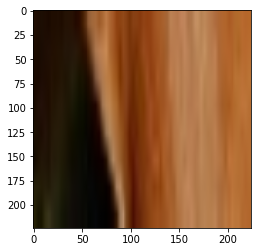